# Projeto 1_Ciência dos Dados_Júlia

Nome: Júlia Ribeiro Martins

## Pergunta (s) a ser respondida:

<p style='text-align:justify;'>O maior investimento do governo em saúde implica na diminuição do número de morte de homens por causa do câncer de próstata?

## Hipótese:

<p style='text-align:justify;'>Com a entrada no IARC (International Agency for Research on Cancer), diminui o número de casos de câncer de prostata entre homens e consequentemente, menor mortalidade.


## Método:

<p style='text-align:justify;'>A partir do momento em que o país passa a fazer parte do IARC, em 1965 (ano de criação do bloco) ele começa a fazer pesquisas na área do câncer, sempre com foco na prevenção da doença, já que é esse o objetivo da organização. Nesses países, por tentar previnir o câncer, acabam tendo um maior gasto na área de saúde (pesquisas demandam dinheiro e também esta incluso gastos com saúde publica que o país oferece). O fato de previnir o câncer de prostata, dentre outros, traz como consequência a diminuição nas taxas de incidência dessa doença entre a população e como consequência, diminuição do número de mortes. Segundo o economista André Medici para o site "Setor Saúde" os gastos em câncer aumentam cada vez mais, sendo uma das doenças com mais gastos. Já que os gastos estao aumentando, vou analisar se as mortes diminuem com o tempo.

## Bases de dados usadas

<p style='text-align:justify;'>Para a Análise de dados que vai ser feita a seguir, irei usar duas tabelas, uma expressando a quantidade de mortes a cada 100 homens, devido ao câncer de prostata e a outra expressando os gastos per capita do governo geral em saúde (valores estão em dólares norte-americanos). A seguir vem os links de onde foram extraídas ambas as tabelas, respectivamente de mortalidade e dos gastos:
    
<br> **Prostate Male Mortality**
<br>http://www.iarc.fr/
<br>http://www-dep.iarc.fr/
<br> **Per capita government expenditure on health at average exchange rate**
<br>http://www.who.int/
<br>http://apps.who.int/nha/database/PreDataExplorer.aspx?d=1


## Análise de dados

<br>**Sobre a organização**
<p style='text-align:justify;'>A analise será em torno da Agência Internacional de Pesquisa em Câncer (Iarc, na sigla em inglês) um órgao da Organização Mundial ds Saúde (OMS) que tem como objetivo promover a colaboração internacional na pesquisa em câncer sempre com foco na prevenção da doença. O orgão foi criado em 1965 e a partir de então, conta com 26 Estados Participantes. Os países da Agência que irei usar para a analise são: Australia, Austria, Canadá, Dinamarca, França, Finlândia, Italia, Holanda, Espanha, Suíça, Estados Unidos e Reino Unido, que foram os primeiros a entrar. Também entrou na análise alguns países de fora da organização, para usar como comparação: Chile, Islândia, Nova Zelândia e Suécia. O período de anos estudado foi de 1956 até 2002, intervalo de tempo que tinha informações mais consistentes.

<br>**Dados analisados**
<p style='text-align:justify;'>Para avaliar se minha hipótese e mecanismo são consistentes ou não, vou analisar duas bases de dados, o indicador de mortalidade atraves do câncer de prostata (numeros são dados a cada 100 homens), fornecido pelo INCA e os gastos per capita do governo geral em saúde (valores estão em dólares norte-americanos), fornecido pela OMS. 
   

In [27]:
#importando as bibliotecas 
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns



#Mostrando em qual diretório estamos trabalhando
os.chdir("C:/Users/julia/OneDrive/DADOS/aula 2/Projeto-1---Ci-ncia-dos-Dados")
print('Esperamos trabalhar no diretório')
print(os.getcwd())



#abrindo a tabela do exel 
prostata= pd.read_excel('indicator prostate male mortality.xlsx')
#colocando os países como índice
prostata_idx = prostata.set_index('Prostate Male Mortality')
#selecionando países analisados do IARC
p=prostata_idx.loc[['Australia','Austria','Canada','Denmark','France','Finland','Italy','Netherlands','Spain','Switzerland','United States','United Kingdom']]
#selecionando os anos relevantes
p_= p[[1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]]

#abrindo a tabela do exel 
gasto= pd.read_excel('indicator_per capita government expenditure on health at average exchange rate (us$).xlsx')
#colocando os países como índice
gasto_idx = gasto.set_index('Per capita government expenditure on health at average exchange rate (US$)')
#selecionando os anos relevantes
a=gasto_idx[[1997,1998,1999,2000,2001,2002]][:]
#selecionando países analisados do IARC
g=a.loc[['Australia','Austria','Canada','Denmark','France','Finland','Italy','Netherlands','Spain','Switzerland','United States','United Kingdom']]


Esperamos trabalhar no diretório
C:\Users\julia\OneDrive\DADOS\aula 2\Projeto-1---Ci-ncia-dos-Dados


**Tabelas**

<p style='text-align:justify;'>A seguinte tabela corresponde a  mortalidade atraves do câncer de prostata por 100 homens no grupo de países escolhidos, os países de dentro da organização foram escolhidos segundo o nível de desenvolvimento e participação da criação da Agência, já os de fora, de diferentes continentes e nível de desenvolvimento. O período de anos escolhidos foi um tempo antes e um tempo depois da criação da agência.

In [28]:
#selecionando países e adcionando a coluna qualitativa, que informa quais são os países pertencentes ou não á IARC depois que ela foi criada
quali=prostata_idx.loc[["Chile","Iceland","Sweden","New Zealand",'Australia','Austria','Canada','Denmark','France','Finland','Italy','Netherlands','Spain','Switzerland','United States','United Kingdom']]
quali_=quali[[1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]][:]
quali_["pertencente_a_IARC_apos_1965"]=["não","não","não","não","sim","sim","sim","sim","sim","sim","sim","sim","sim","sim","sim","sim"]
quali_

,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,pertencente_a_IARC_apos_1965
Prostate Male Mortality,,,,,,,,,,,,,,,,,,,,,
Chile,6.29,7.32,7.97,8.64,8.84,9.13,7.50,7.31,7.10,8.30,...,16.04,18.27,19.66,18.78,19.40,18.46,18.43,17.84,17.90,não
Iceland,5.32,11.11,9.08,6.43,8.08,5.44,5.84,10.20,7.74,4.90,...,13.78,15.17,27.92,20.31,21.26,20.26,19.17,17.17,25.48,não
Sweden,13.78,14.63,15.81,16.40,16.40,16.82,17.62,18.89,18.23,17.16,...,20.65,21.75,21.78,22.49,22.19,22.03,21.93,21.30,19.94,não
New Zealand,14.30,13.79,13.80,14.60,12.47,13.18,14.09,16.80,13.00,15.03,...,19.25,20.54,17.97,18.91,17.94,18.46,19.47,18.91,18.15,não
Australia,15.15,15.41,15.21,15.14,15.49,14.80,13.70,13.91,15.13,14.78,...,19.56,18.49,18.46,16.53,16.64,15.59,16.04,15.70,15.85,sim
Austria,12.31,14.09,12.41,13.36,13.67,13.45,13.25,13.63,13.39,14.23,...,16.40,17.52,17.00,16.76,15.75,16.63,16.32,15.53,14.63,sim
Canada,13.42,12.67,12.83,13.31,12.83,14.74,13.60,12.69,12.98,13.30,...,16.68,16.77,15.59,15.17,14.88,14.21,14.25,14.07,13.34,sim
Denmark,13.64,13.70,13.79,14.56,13.20,14.15,15.26,14.85,15.78,15.80,...,19.72,20.12,19.78,19.25,18.84,19.26,20.11,20.70,21.29,sim
France,12.90,13.30,14.41,13.84,15.16,14.78,15.06,15.84,15.01,15.44,...,16.21,15.58,15.57,15.25,15.12,15.16,14.44,14.07,14.28,sim


<p style='text-align:justify;'>Essa tabela mostra os gastos do governo geral em saúde, medido em dólares norte-americanos. O período de anos foi limitado já que não existe informações dos anos anteriores.

In [29]:
g0=a.loc[["Chile","Iceland","Sweden","New Zealand",'Australia','Austria','Canada','Denmark','France','Finland','Italy','Netherlands','Spain','Switzerland','United States','United Kingdom']]
g0["pertencente_a_IARC_apos_1965"]=["não","não","não","não","sim","sim","sim","sim","sim","sim","sim","sim","sim","sim","sim","sim"]
g0

,1997,1998,1999,2000,2001,2002,pertencente_a_IARC_apos_1965
Per capita government expenditure on health at average exchange rate (US$),,,,,,,
Chile,155.757857,162.665686,157.631596,168.587646,159.300402,156.921274,não
Iceland,2249.871384,2251.637271,2674.539584,2472.918087,2176.259761,2657.869951,não
Sweden,1971.455075,2003.741972,2053.305977,1935.180766,1837.134334,2112.830606,não
New Zealand,1002.668370,865.911630,893.693810,820.291339,803.589474,969.187144,não
Australia,1178.039092,1053.227780,1193.335611,1144.752844,1081.669023,1235.744552,sim
Austria,1929.511347,2018.319654,2049.536567,1823.838758,1815.096639,1953.658872,sim
Canada,1313.381693,1304.444253,1354.960612,1469.882028,1503.860740,1563.676245,sim
Denmark,2162.725329,2192.235623,2457.316591,2187.759216,2294.812253,2550.329852,sim
France,1939.578735,1973.643610,1947.876436,1748.609613,1773.692979,1982.937364,sim


**Relação entre variáveis**

<p style='text-align:justify;'>A partir do momento em que o país passa a fazer parte do IARC, em 1965, ele começa a fazer pesquisas na área do câncer, sempre com foco na prevenção da doença. Nesses países, por tentar previnir o câncer, acabam tendo um maior gasto na área de saúde (pesquisas demandam dinheiro e também esta incluso gastos com saúde publica que o país oferece). O fato de previnir o câncer de prostata, traz como consequência a diminuição nas taxas de incidência dessa doença entre a população e como consequência, diminuição do número de mortes. Segundo o economista André Medici para o site "Setor Saúde" os gastos em câncer aumentam cada vez mais, sendo uma das doenças com mais gastos. Já que os gastos estao aumentando, vou analisar se as mortes diminuem com o tempo.

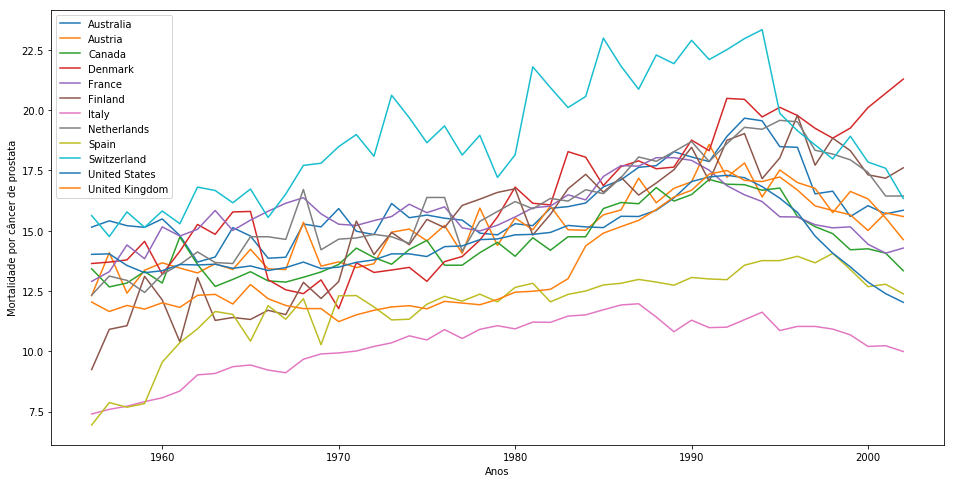

C:\Users\julia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


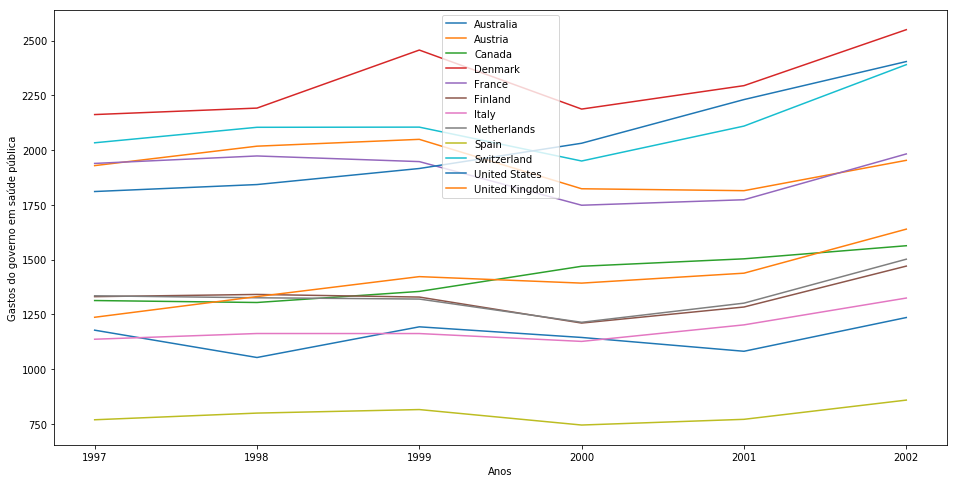

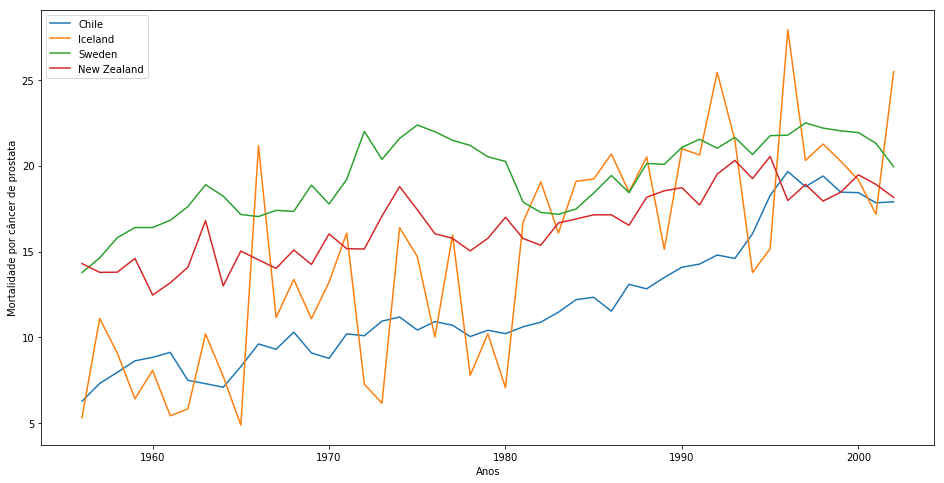

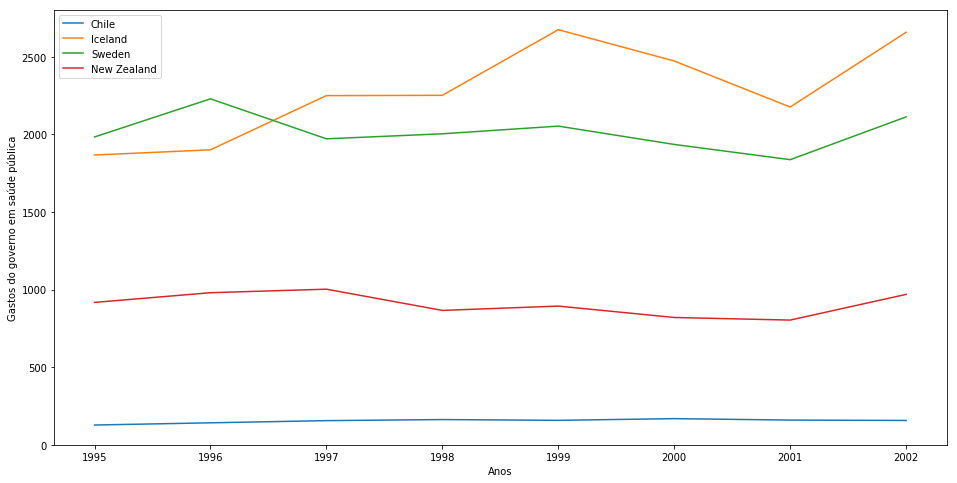

In [30]:
#alguns países dentro da IARC
IARC=['Australia','Austria','Canada','Denmark','France','Finland','Italy','Netherlands','Spain','Switzerland','United States','United Kingdom']
anos=[1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]
#plotando gráficos de linha
#mortalidade
plt.figure(figsize=(16, 8))
for i in IARC:
    plt.plot(p_.loc[i,anos], label=i)
plt.xlabel('Anos')
plt.ylabel('Mortalidade por câncer de prostata')
plt.legend()
plt.show()
#gastos com saúde
plt.figure(figsize=(16,8))
for i in IARC:
    plt.plot(g.loc[i,anos], label=i)
    
plt.xlabel('Anos')
plt.ylabel('Gastos do governo em saúde pública')
plt.legend()
plt.show()

#alguns países fora da IARC
fora_da_IARC=["Chile","Iceland","Sweden","New Zealand"]
anos2=[1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]
#plotando gráficos de linha 
#mortalidade
plt.figure(figsize=(16, 8))
for i in fora_da_IARC:
    plt.plot(prostata_idx.loc[i,anos2], label=i)
plt.xlabel('Anos')
plt.ylabel('Mortalidade por câncer de prostata')
plt.legend()
plt.show()
#gastos com saúde
plt.figure(figsize=(16, 8))
for i in fora_da_IARC:
    plt.plot(gasto_idx.loc[i,anos2], label=i)
plt.xlabel('Anos')
plt.ylabel('Gastos do governo em saúde pública')
plt.legend()
plt.show()

<p style='text-align:justify;'>Depois da analise dos gráficos de linha, já deu para notar que as mortes estão aumentando, enquanto os gastos variam em torno de um valor médio, contrario ao que tinha afirmado no mecanismo.

<p style='text-align:justify;'>Continuando a analise da relação das duas "variáveis", mortes e gastos com saúde, mas agora de uma maneira mais exata.

C:\Users\julia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


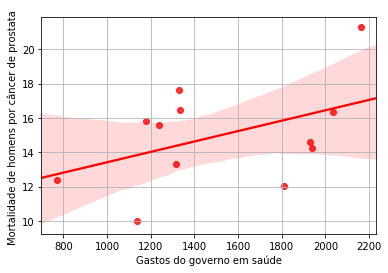

In [31]:
x=prostata_idx[[1998,1999,2000,2001,2002]][:]
g_=g[[1997]][:]
y=p_.loc[['Australia','Austria','Canada','Denmark','France','Finland','Italy','Netherlands','Spain','Switzerland','United States','United Kingdom']]
y_=y[[2002]][:]
juntas = g_.join(y_, how='inner', lsuffix='_gasto', rsuffix='_prostata')
juntas.columns=["gastos_1997","mortalidade_2002"]
cor=juntas.corr()
sns.regplot(juntas["gastos_1997"], juntas["mortalidade_2002"], color=('red'))
plt.xlabel('Gastos do governo em saúde')
plt.ylabel('Mortalidade de homens por câncer de prostata ')
plt.grid()
plt.show()


In [32]:
juntas[["gastos_1997","mortalidade_2002"]].corr()

,gastos_1997,mortalidade_2002
gastos_1997,1.000000,0.450933
mortalidade_2002,0.450933,1.000000


<p style='text-align:justify;'>Pelo gráfico e pela tabela de correlação, nota-se que não há uma relação clara entre as duas variáveis (gastos e mortalidade). Já que na tabela, mostra que a correlação tem um valor de 0.45 e os pontos no gráfico estão todos dispersos.

**OBS.:**
Os gastos do governo com saúde em 1997, só iria refletir em melhoras na saúde depois de alguns anos, por isso esse intervalo de tempo.

**Comparação de países dentro e fora do INCA**
<p style='text-align:justify;'>Quando o país entra para a Agência, passa a investir mais em saúde e então a mortalidade tende a cair, segundo o mecanismo feito inicialmente. Por meio de mais um gráfico, irei analisar isso, mas agora comparando países dentro e fora da organização, e não duas variáveis.

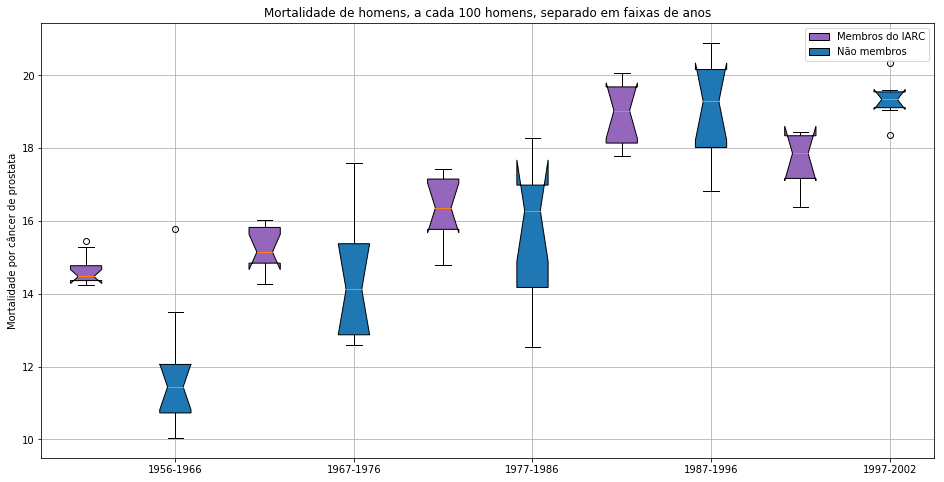

In [34]:
#separando as tabelas com países selecionados 
fora=prostata_idx.loc[["Chile","Iceland","Sweden","New Zealand"]]
fora_=fora[[1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002]][:]
dentro=p_.loc[['Australia','Switzerland','Denmark','Netherlands']]

#separando a tabela por faixas de anos
a=dentro.iloc[:,0:11]
aa=fora_.iloc[:,0:11]
b=dentro.iloc[:,11:21]
bb=fora_.iloc[:,11:21]
c=dentro.iloc[:,21:31]
cc=fora_.iloc[:,21:31]
d=dentro.iloc[:,31:41]
dd=fora_.iloc[:,31:41]
e=dentro.iloc[:,41:51]
ee=fora_.iloc[:,41:51]

#plotando um boxplot
fig,ax=plt.subplots(1,1,figsize=(16,8))
plt.title('Mortalidade de homens, a cada 100 homens, separado em faixas de anos')
plt.ylabel('Mortalidade por câncer de prostata')
membros=ax.boxplot([a.median().values,b.median().values,c.median().values,d.median().values,e.median().values],positions=[1,3,5,7,9],notch=True, widths=0.35,patch_artist=True,boxprops=dict(facecolor="C4"))
nao_membros=ax.boxplot([aa.median().values,bb.median().values,cc.median().values,dd.median().values,ee.median().values],positions=[2,4,6,8,10],notch=True, widths=0.35,patch_artist=True,boxprops=dict(facecolor="C0"))
plt.gca().set_xticklabels(['1956-1966','1967-1976','1977-1986','1987-1996','1997-2002'])
ax.legend([membros["boxes"][1],nao_membros["boxes"][1]],["Membros do IARC","Não membros"],loc='upper right')
ax.set_xlim(0.5)
plt.grid(which='both')
plt.show()

<p style='text-align:justify;'>Nota-se que a mortalidade dos países membros é maior no início e não decresce muito após 1965 (o ano de entrada na organização), já os países não membros, a mortalidade é menor no início e decresce junto com os membros.

## Conclusão

<p style='text-align:justify;'>Com base na analise dos dados obtida, observando tanto as tabelas quanto os gráficos de linha e boxplot, pode-se concluir que o maior investimento do governo em saúde não implica diretamente na diminuição do número de morte de homens por causa do câncer de próstata, essas variáveis não tem uma relação clara. O câncer de próstata, segundo o proprio site do INCA, é mais frequente em pessoas mais velhas, 75% dos casos no mundo ocorrem a partir dos 65 anos de idade, e pessoas tem uma longevidade maior em países mais desenvolvidos (os que gastam mais em saúde), consequentemente, o câncer atinge mais pessoas em países mais ricos, são justamente esses países que estão entre os fundadores do INCA. Essa hipótese apresentada pode ser um dos fatores do por que não ter relação, mas também há outro fator bem importante, que é o fator genético, homens nesses países analisados podem ser mais propensos a ter câncer de próstata. Por isso, a resposta da pergunta feita é não, já que tem muitas outras variáveis em questão, uma analise simples como essa não mostraria uma relação clara.

**Fontes de pesquisa:**
<p>https://www.inca.gov.br/tipos-de-cancer/cancer-de-prostata
<p>https://www.gapminder.org/data/
<p>https://www.inca.gov.br/atuacao-internacional/agencia-internacional-pesquisa-em-cancer-iarc
<p>https://www.iarc.fr/about-iarc-membership/
<p>https://setorsaude.com.br/o-custo-do-tratamento-do-cancer-no-brasil/

